# Tutorial OpenCV

In [1]:
import numpy as np
import cv2 as cv

imaxe1 = cv.imread("imaxes/ia10.jpeg")
type(imaxe1)


numpy.ndarray

Para ler unha imaxe utilízase [imread](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56).

OpenCV-python traballa con numpy, as imaxes lidas son de tipo ndarray... se pode aplicar todo o que sabes de numpy
Unha imaxe vai a estar composta de planos de colores do mesmo tamaño. Todos van a ter alto, ancho e o color en compoñentes BGR (ollo non RGB)

Esta imaxe ten 780 px de alto e 1170 de ancho

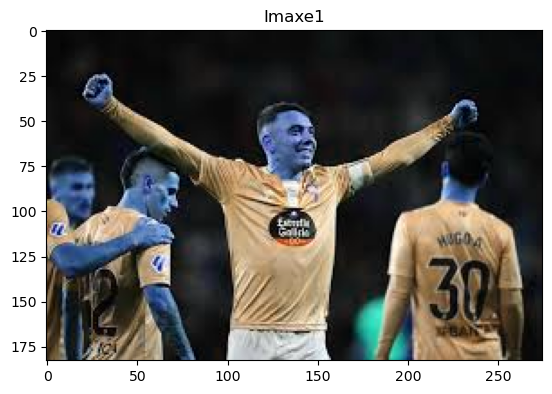

In [2]:
from matplotlib import pyplot as plt

plt.imshow(imaxe1)
plt.title('Imaxe1')
plt.show()



In [3]:
imaxe1.shape

(183, 275, 3)


Unha vez lida se pode acceder a cada pixel invidual a partires das cordenadas do punto

In [4]:
px = imaxe1[100,100]
display(px)

array([189, 159, 118], dtype=uint8)

O contido de cada punto e un array de 3 elementos en formato BGR (Blue, Green, Red). Importante telo en conta se traballas con outras librias.

## Imaxes blanco e negro
As imaxes en escala de grises só deberían ter unha única canle. Pero moitos programas gráficos as almacenan coma con 3 canles, co mesmo contido nos mesmos.

Se pode solucionar en openCV con *cv.IMREAD_GRAYSCALE*

In [247]:
imaxe2 = cv.imread("imaxes/photo3.png",cv.IMREAD_GRAYSCALE)
display(imaxe2.shape)
px2 = imaxe2[100,100]
display(px2)

(1030, 687)

26

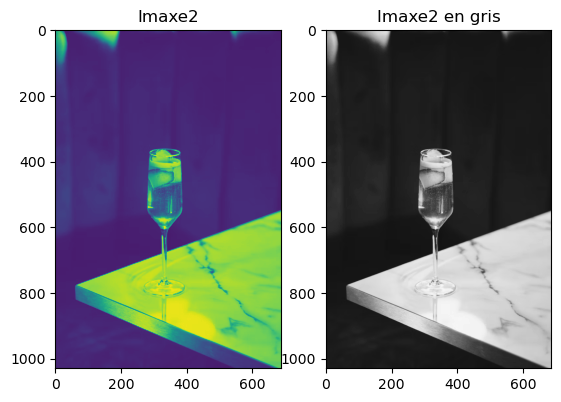

In [248]:
plt.subplot(1, 2, 1)
plt.imshow(imaxe2)
plt.title('Imaxe2')
plt.subplot(1, 2, 2)
plt.imshow(imaxe2,cmap='gray', vmin=0, vmax=255)
plt.title('Imaxe2 en gris')
plt.show()

## Rexións

Moitas veces en vez de traballar con píxeles, se vai traballar con rexións. As imaxes son arrays de numpy, así que é sinxelo

Text(0.5, 1.0, 'Un recorte de imaxe2')

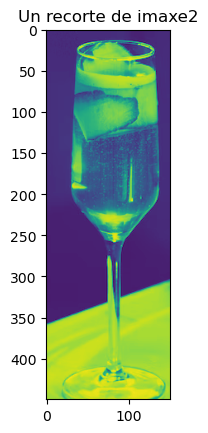

In [249]:
recorte = imaxe2[350:800,250:400]
plt.imshow(recorte)
plt.title('Un recorte de imaxe2')


E se pode asignar valores, coma en numpy

imaxe3[0:100,0:100] = 0

Text(0.5, 1.0, 'Copiando anacos')

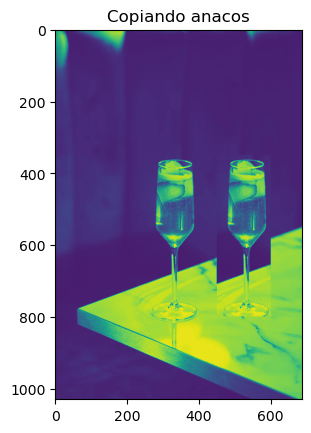

In [250]:
imaxe3 = imaxe2.copy()
imaxe3[350:800,450:600] = recorte
plt.imshow(imaxe3)
plt.title('Copiando anacos')

# Engadir bordes

Podense engadir bordes, ao estilo dun marco, as imaxes. O borde que se engade porde ser de moitos xeito, color constante, replicando o borde actual, etc.

Text(0.5, 1.0, 'Engadindo borde anacos')

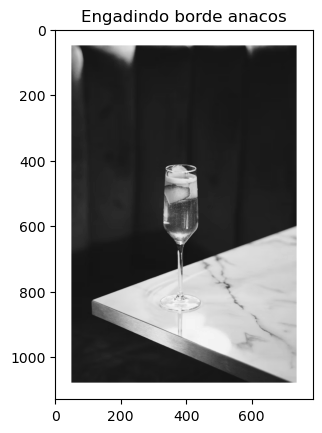

In [251]:
constant= cv.copyMakeBorder(imaxe2,50,50,50,50,cv.BORDER_CONSTANT,value=255)

plt.imshow(constant,cmap='gray', vmin=0, vmax=255)
plt.title('Engadindo borde anacos')

## Salvar imaxes
As imaxes se poden gardar en disco. Seguramente antes diso xa se lle tería feita algunha transformación, pero neste caso...

In [252]:
cv.imwrite("imaxes/resultado1.png",constant)

True

# Transformacións
É moi normal ter que introducir algunha trasformación nas imaxes.

## Escalado
O escalado consiste en cambiar o tamaño da imaxes, ben sexa para facela máis grande, ben sexa para facela máis pequena. Úsase o método *resize*

Tamaño orixinal 183 x 275
Tamaño escalado 366 x 550


Text(0.5, 1.0, 'Imaxe o dobre de grande')

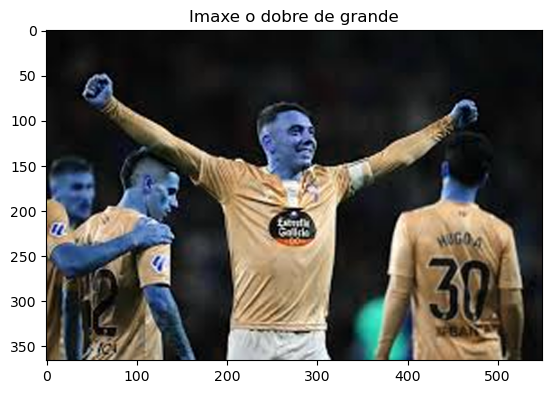

In [5]:
print(f"Tamaño orixinal {imaxe1.shape[0]} x {imaxe1.shape[1]}")
escalado1 = cv.resize(imaxe1,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
print(f"Tamaño escalado {escalado1.shape[0]} x {escalado1.shape[1]}")
plt.imshow(escalado1)
plt.title('Imaxe o dobre de grande')

In [6]:
print(f"Tamaño orixinal {imaxe1.shape[0]} x {imaxe1.shape[1]}")
escalado1 = cv.resize(imaxe1,None,fx=0.5, fy=0.5, interpolation = cv.INTER_AREA)
print(f"Tamaño escalado {escalado1.shape[0]} x {escalado1.shape[1]}")

Tamaño orixinal 183 x 275
Tamaño escalado 92 x 138


## Desprazamento
Para desprazar a imaxe se precisa un desprazamento para x e para y (tx,ty). Con estes valores se crea unha matriz de transformación M

Text(0.5, 1.0, 'Imaxe desprazada')

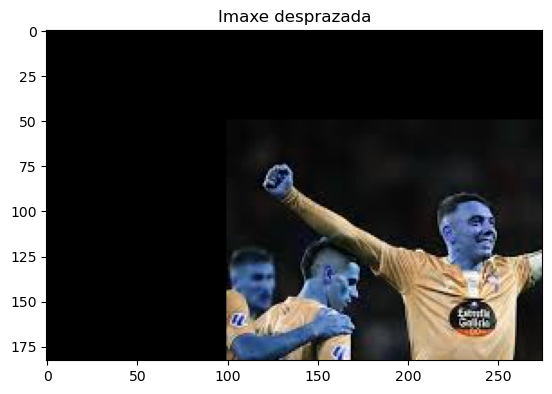

In [10]:
rows,cols,colores = imaxe1.shape
tx = 100
ty = 50
M = np.float32([[1,0,tx],[0,1,ty]])
desprazada = cv.warpAffine(imaxe1,M,(cols,rows))

plt.imshow(desprazada)
plt.title('Imaxe desprazada')

## Cambio perspectiva

En ocasións, cando se traballa con fotos ou documentos escaneados, as imaxes están torcidas

Text(0.5, 1.0, 'Escaneo torcido')

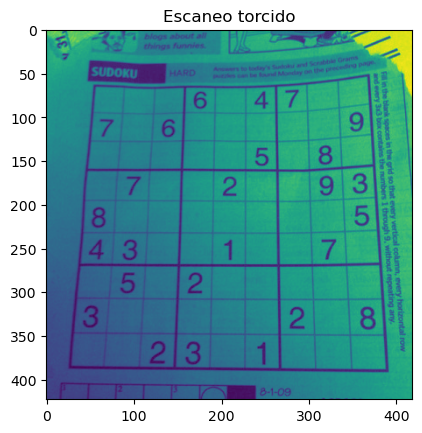

In [12]:
sudoku = cv.imread('imaxes/sudoku.jpg',cv.IMREAD_GRAYSCALE)
plt.imshow(sudoku)
plt.title('Escaneo torcido')

A idea é cambiar a perspectiva de tal xeito que o sudoku apareza frontal na imaxe. Para iso é necesario ter as cordenadas das catro esquinas onde na imaxe orixinal se encontran e as cordenadas de onde deben situarse as catro esquinas na imaxe final.

In [13]:
rows,cols = sudoku.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) #posición das esquinas actuais

pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]]) # nova posicion das esquinas

# isto proporciona a matriz de transformación
M = cv.getPerspectiveTransform(pts1,pts2)
display(M)

sudokuDereito = cv.warpPerspective(sudoku,M,(cols,rows))
plt.imshow(sudokuDereito)
plt.title('Escaneo enderezado')

(423, 419)


Como podes ver queda un pouco raro as partes que se ten que inventar. O normal sería quedarse só coa parte que se endereza, o sudoku. Neste caso o que hai que facer é poñer como tamaño da imaxe o ancho e o alto que ten o sudoku enderezado, que neste caso é 300x300

Text(0.5, 1.0, 'Escaneo enderezado e recordado')

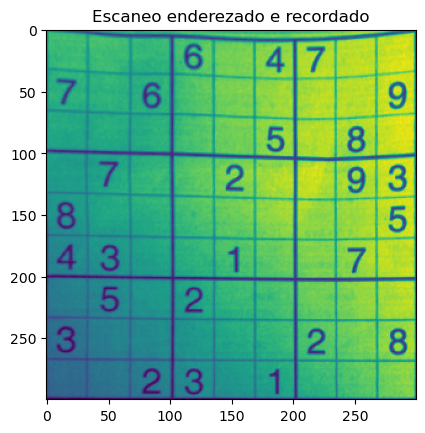

In [258]:
sudokuDereito = cv.warpPerspective(sudoku,M,(300,300))
plt.imshow(sudokuDereito)
plt.title('Escaneo enderezado e recordado')

Quizais neste caso o complicado é obter as cordenadas orixinais ben ordenadas, e calcular unhas cordenadas de destino acordes. Imos a plantexar unhas funcións de axuda.

A función order_points, encargase de ordenar as cordenas de tal xeito que a primeira sexa a de arriba a esquerda, logo arriba a dereita, e o resto seguindo o sentido das agullas do reloxio. Isto é importante xa que cando obteñamos contornos con OpenCV non sempre van a aparecer nesa orde.

A función four_point_transform vai coller as cordenadas, ordenalas, obter as cordenadas de destino para que queden formando un cuadritalero e aplicala a imaxe.

In [259]:
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv.getPerspectiveTransform(rect, dst)
	warped = cv.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped    

Vexamos como queda no caso do sudoku anterior

Text(0.5, 1.0, 'Escaneo enderezado e recordado')

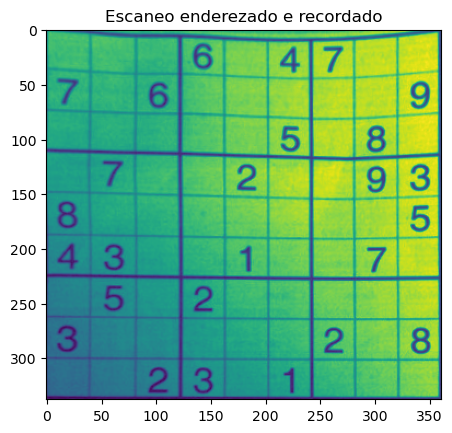

In [260]:
pts1 = np.float32([[368,52],[28,387],[389,390],[56,65]]) # posición das esquinas actuais, un pouco desordenadas

sudokuDereito = four_point_transform(sudoku,pts1)
plt.imshow(sudokuDereito)
plt.title('Escaneo enderezado e recordado')

# Filtrado de imaxes
As imaxes poden ser filtradas para reducir o ruido ou para a detección de caracteristicas. A operación úsada se coñece como convolución, onde unha matriz se convoluciona cos pixeles da imaxe, dando coma resultado unha imaxe distinta.

Unha convolución é sinxelamente un multiplicación elemento elemento dun kernel e algunha parte de imaxe de fonte para producir un novo pixel. Esta operación se aplica a todos os píxeles da imaxe dando coma resultado unha imaxe nova.

![Drag Racing](imaxes/Convolution-Image-Processing-Example-1.png.webp)

En OpenCV temos a función filter2D que fai precisamente iso.


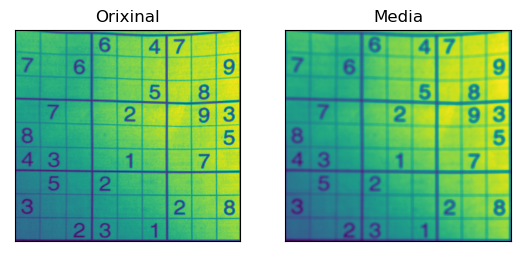

In [261]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(sudokuDereito,-1,kernel)
plt.subplot(121),plt.imshow(sudokuDereito),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Media')
plt.xticks([]), plt.yticks([])
plt.show()

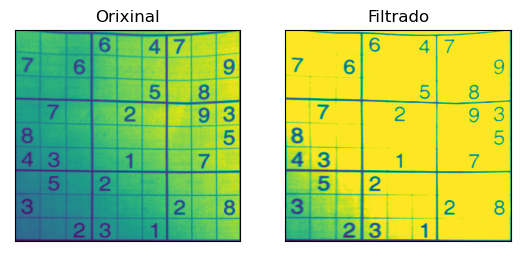

In [262]:
kernel1 = np.array([[0., 0., 0.],
         [1., 1., 1.],
         [0., 0., 0.]],np.float32)
dst = cv.filter2D(sudokuDereito,-1,kernel1)
plt.subplot(121),plt.imshow(sudokuDereito),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Filtrado')
plt.xticks([]), plt.yticks([])
plt.show()

O seguinte filtro, busca bordes.

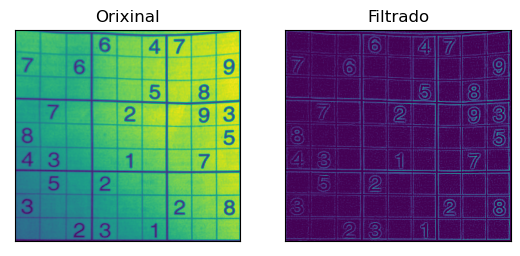

In [263]:
kernel2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
dst = cv.filter2D(sudokuDereito,-1,kernel2)
plt.subplot(121),plt.imshow(sudokuDereito),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Filtrado')
plt.xticks([]), plt.yticks([])
plt.show()

Existen algúns filtros xa predefinidos coma función, o que fai mais sinxelo usalos.
- blur: serve para suavizar a imaxe
- GaussianBlur: suavizado tamén, pero cun kernel gaussinao

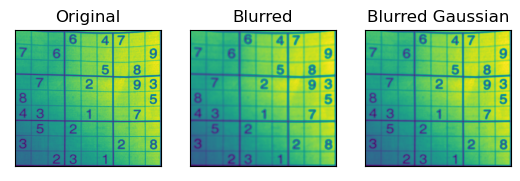

In [264]:
blur = cv.blur(sudokuDereito,(5,5))
blurG = cv.GaussianBlur(sudokuDereito,(5,5),0)
plt.subplot(131),plt.imshow(sudokuDereito),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blurG),plt.title('Blurred Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

# Umbrais de imaxes

Para realizar certas operacións sobre imaxes, é preciso reducir o número de colores desta, en moitas ocasións a dóus unico colores (branco e negro). Existen moitos métodos distintos, dende unha simple comprobación de intensidade (os valores maiores pasan a branco e os menores a negro) ata outros (como Otsu ou Gaussian) que teñen en conta otros factores.

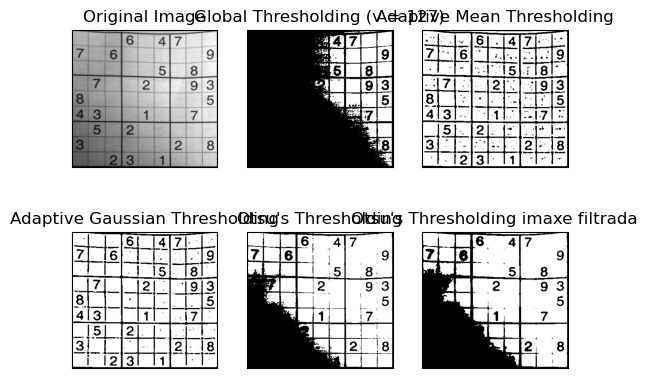

In [265]:
blurMedian = cv.medianBlur(sudokuDereito,5)
blur = cv.GaussianBlur(sudokuDereito,(5,5),0)

ret,th1 = cv.threshold(sudokuDereito,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(blurMedian,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(blurMedian,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
# Otsu's thresholding
ret4,th4 = cv.threshold(sudokuDereito,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering

ret5,th5 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)            
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding', "Otsu's Thresholding", "Otsu's Thresholding imaxe filtrada"]
images = [sudokuDereito, th1, th2, th3, th4, th5]
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Erosión e dilatación
Estas operacións se aplican normalmente a imaxes binarias (blanco e negro). A erosión consegue adelgazar as liñas, namentras a dilatación as engorda.

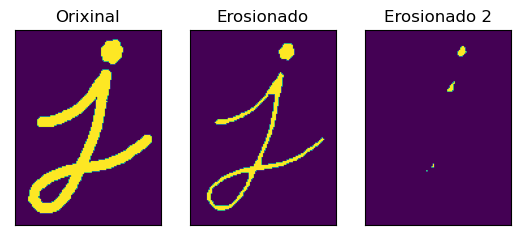

In [266]:
letraJ = cv.imread('imaxes/letter_j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(letraJ,kernel,iterations = 1)
erosion2 = cv.erode(letraJ,kernel,iterations = 2)

plt.subplot(131),plt.imshow(letraJ),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(erosion),plt.title('Erosionado')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(erosion2),plt.title('Erosionado 2')
plt.xticks([]), plt.yticks([])

plt.show()

Algo a ter en conta e que se podería extraer vendo as imaxes de arriba é que as liñas a erosionar é o branco e o fondo é negro. Moitas das imaxes coas que se traballa van realmente ao revés, polo que hai que invertilas.

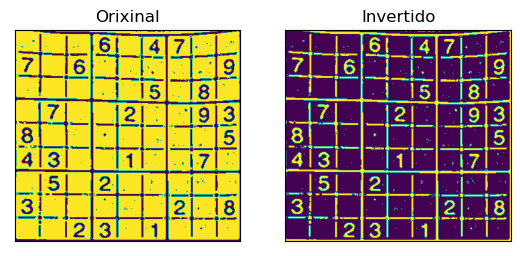

In [267]:
th3 = cv.adaptiveThreshold(blurMedian,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
sodokuInvertido = cv.bitwise_not(th3)

plt.subplot(121),plt.imshow(th3),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sodokuInvertido),plt.title('Invertido')
plt.xticks([]), plt.yticks([])
plt.show()

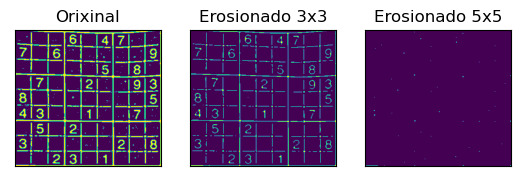

In [268]:

kernel1 = np.ones((3,3),np.uint8)
erosion1 = cv.erode(sodokuInvertido,kernel1,iterations = 1)
kernel2 = np.ones((5,5),np.uint8)
erosion2 = cv.erode(sodokuInvertido,kernel2,iterations = 1)

plt.subplot(131),plt.imshow(sodokuInvertido),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(erosion1),plt.title('Erosionado 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(erosion2),plt.title('Erosionado 5x5')
plt.xticks([]), plt.yticks([])

plt.show()
          

A dilatación é igual, pero coa función *dilate*

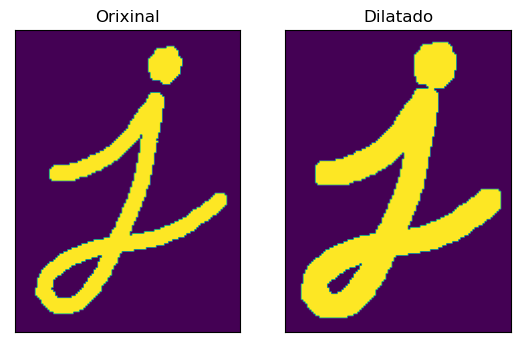

In [269]:
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(letraJ,kernel,iterations = 1)
plt.subplot(121),plt.imshow(letraJ),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('Dilatado')
plt.xticks([]), plt.yticks([])
plt.show()

Tamén existen combinacións destas dúas operacións para producir efectos na imaxe:
- opening: erosión e logo dilatación. Elimina ruídos das imaxe
- closing: dilatación e logo erosión. Elimina hocos dentro das estruturas pechadas
- gradiente morfolóxico: a diferencia entre dilatación e erosión. Obtén o borde exterior do elemento.

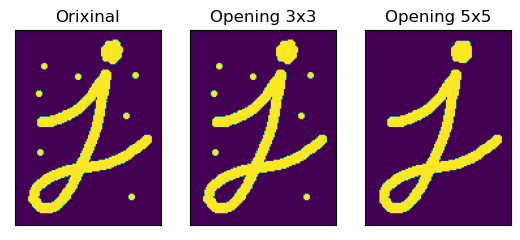

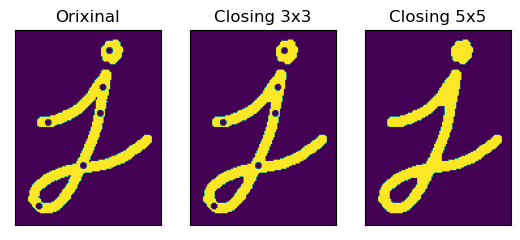

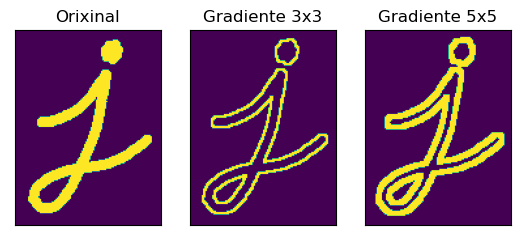

In [270]:
letraJPuntos = cv.imread('imaxes/letter_j_puntos.png',0)
letraJHuecos = cv.imread('imaxes/letter_j_huecos.png',0)
kernel1 = np.ones((3,3),np.uint8)
kernel2 = np.ones((5,5),np.uint8)
opening1 = cv.morphologyEx(letraJPuntos, cv.MORPH_OPEN, kernel1)
opening2 = cv.morphologyEx(letraJPuntos, cv.MORPH_OPEN, kernel2)

plt.subplot(131),plt.imshow(letraJPuntos),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(opening1),plt.title('Opening 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(opening2),plt.title('Opening 5x5')
plt.xticks([]), plt.yticks([])

plt.show()

closing1 = cv.morphologyEx(letraJHuecos, cv.MORPH_CLOSE, kernel1)
closing2 = cv.morphologyEx(letraJHuecos, cv.MORPH_CLOSE, kernel2)
plt.subplot(131),plt.imshow(letraJHuecos),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(closing1),plt.title('Closing 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closing2),plt.title('Closing 5x5')
plt.xticks([]), plt.yticks([])
plt.show()

gradient1 = cv.morphologyEx(letraJ, cv.MORPH_GRADIENT, kernel1)
gradient2 = cv.morphologyEx(letraJ, cv.MORPH_GRADIENT, kernel2)
plt.subplot(131),plt.imshow(letraJ),plt.title('Orixinal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gradient1),plt.title('Gradiente 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(gradient2),plt.title('Gradiente 5x5')
plt.xticks([]), plt.yticks([])
plt.show()

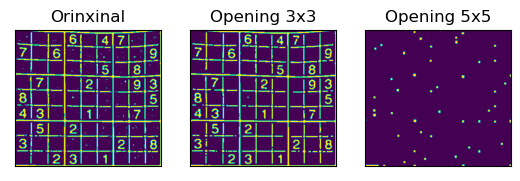

In [271]:
kernel1 = np.ones((3,3),np.uint8)
opening1 = cv.morphologyEx(sodokuInvertido, cv.MORPH_OPEN, kernel1)
opening2 = cv.morphologyEx(sodokuInvertido, cv.MORPH_OPEN, kernel2)

plt.subplot(131),plt.imshow(sodokuInvertido),plt.title('Orinxinal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(opening1),plt.title('Opening 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(opening2),plt.title('Opening 5x5')
plt.xticks([]), plt.yticks([])

plt.show()

# Detección de bordes Canny

Canny é un detector de bordes moi habitual. A función canny o aplica. Ten catro argumentos:
* A imaxe a tratar
* umbral mínimo
* umbral máximo
* tamaño do kernel Sobel, por defecto 3

Se un pixel ten un valor menor que o umbral mínimo se considera fondo, se supera o umbral máximo se considera borde e se está no medio se considerará borde ou non dependendo se está conectado a outros pixeles borde ou non.

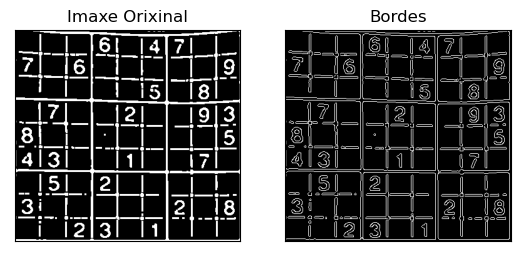

In [272]:
edges = cv.Canny(opening1,100,200)
plt.subplot(121),plt.imshow(opening1,cmap = 'gray')
plt.title('Imaxe Orixinal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Bordes'), plt.xticks([]), plt.yticks([])
plt.show()

# Debuxo

En ocasións é util debuxar nas imaxes que temos. Por exemplo, fago algún tipo de búsqueda dun obxecto o detección de bordes é se desexa ver que é o que detectou.

Pódense debuxar formas simples dun xeito sinxelo:
* line
* rectangle
* circle
* polylines

Todos eles van a coller coma parámetros:
* a imaxe a debuxar
* os puntos de orixe ou radio
* unha tupla para representar a cor
* o grosor da liña


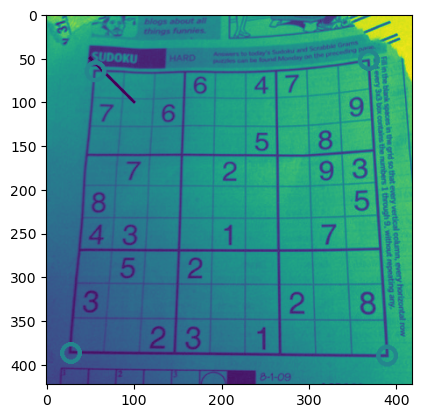

In [273]:
copiaJ = sudoku.copy()
cv.line(copiaJ,(50,50),(100,100),(0,255,0),3) # Sea en negro, porque a imaxe é en escala de grises

for punto in pts1:
    p = punto.astype(int)
    cv.circle(copiaJ,p,10,(100,100,100),3) 
plt.imshow(copiaJ)
plt.show()

# Detección de contornos

Os contornos son curvas que unen puntos da mesma cor ou intensidade. Son útiles para o análise de formas o detección de obxectos.

Funcionan mellor con imaxes binarias, polo que sugramente primeiro haberá que transformalas. Buscar contornos é buscar obxectos brancos en fondos negros, polo que en ocasións será necesario invertir a imaxe.

A función a usar é *findContours*, que vai recibir 3 parámetros:
* a imaxe
* o método de extracción de contornos:
    * cv.RETR_TREE
    * cv2.RETR_LIST
* o método de aproximación de contornos:
    * cv.CHAIN_APPROX_NONE
    * cv.CHAIN_APPROX_SIMPLE


array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1,  3, -1],
        [-1, -1, -1,  2]]], dtype=int32)

'Numero contornos 4'

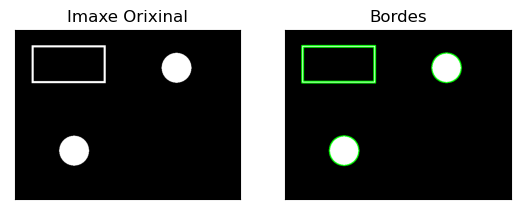

In [277]:
cuadradoCirculo = cv.imread('imaxes/cuadrado-circulo.png',0)
cnts,hierarchy = cv.findContours(cuadradoCirculo, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
cnts2,hierarchy2 = cv.findContours(cuadradoCirculo, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
display(hierarchy2)
display(f"Numero contornos {len(cnts)}")
conContornos = cv.cvtColor(cuadradoCirculo,cv.COLOR_GRAY2RGB)

cv.drawContours(conContornos, cnts, -1, (0, 255, 0), 2)
plt.subplot(121),plt.imshow(cuadradoCirculo,cmap = 'gray')
plt.title('Imaxe Orixinal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(conContornos,cmap = 'gray')
plt.title('Bordes'), plt.xticks([]), plt.yticks([])
plt.show()

De cada contorno se pode obter información:
* moments
* contourArea: area
* arcLength: perimetro
* approxPolyDP: aproxima o contorno con un polígono máis simple
* convexHull: é un perímetro máis simple que contén a todos os puntos do contorno. Similar ao anterior.
* boundingRect: obten un rectángulo que conten a todos os puntos do contorno
* minEnclosingCircle: como o anterior, pero cun círculo

In [275]:
for contorno in cnts:
    M = cv.moments(contorno)
    area = cv.contourArea(contorno)
    print( M )
    print(f"Area: {area}")
    perimeter = cv.arcLength(contorno,True)
    approx = cv.approxPolyDP(contorno,0.01*perimeter,True)
    circularity = 4*np.pi*(area/(perimeter*perimeter))
    if circularity > 0.8:
        print(f"O contorno con {len(contorno)} vertices parece un circulo")
    else:
        print(f"O contorno con {len(contorno)} vertices NON parece un circulo")


{'m00': 5462.0, 'm10': 912154.0, 'm01': 1873466.0, 'm20': 154704075.66666666, 'm11': 312868822.0, 'm02': 644973195.6666666, 'm30': 26628616097.0, 'm21': 53063497953.666664, 'm12': 107710523676.33333, 'm03': 222854615473.0, 'mu20': 2374357.6666666567, 'mu11': 0.0, 'mu02': 2374357.666666627, 'mu30': 3.814697265625e-06, 'mu21': 8.344650268554688e-07, 'mu12': 1.5497207641601562e-06, 'mu03': 3.0517578125e-05, 'nu20': 0.07958711259305686, 'nu11': 0.0, 'nu02': 0.07958711259305586, 'nu30': 1.7301383730750422e-15, 'nu21': 3.7846776911016546e-16, 'nu12': 7.028687140617359e-16, 'nu03': 1.3841106984600337e-14}
Area: 5462.0
O contorno con 120 vertices parece un circulo
{'m00': 5462.0, 'm10': 2496134.0, 'm01': 595358.0, 'm20': 1143107595.6666665, 'm11': 272078606.0, 'm02': 67268379.66666666, 'm30': 524570334127.0, 'm21': 124598727927.66667, 'm12': 30741649507.666668, 'm03': 7849863355.0, 'mu20': 2374357.666666746, 'mu11': 5.960464477539063e-08, 'mu02': 2374357.666666664, 'mu30': 6.103515625e-05, 'mu